# Gradient Boosting
1. Gradient Boosting is a boosting technique that builds models sequentially, just like AdaBoost, but it uses gradient descent to minimize a loss function. It’s one of the most powerful techniques for both regression and classification tasks.

2. Core Idea:
Train new models to predict the errors (residuals) of previous models. These predictions are combined to make a stronger final model.

In [21]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
# Step 1: Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
# Step 2: Features and target
X = df.drop('target', axis=1)
y = df['target']


In [9]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 4: Hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4],
    'subsample': [1.0, 0.8]
}

In [13]:
# Step 5: Initialize and fit GridSearchCV
model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 4],
                         'n_estimators': [100, 150], 'subsample': [1.0, 0.8]},
             scoring='accuracy')

In [15]:
# Step 6: Predictions and evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [17]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



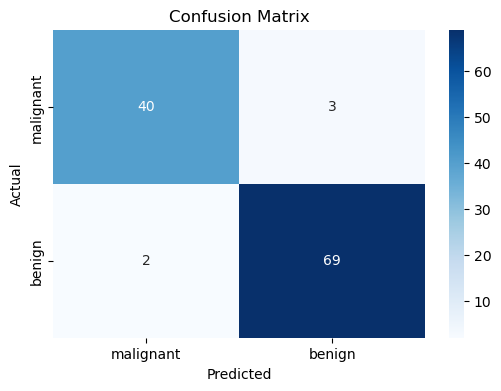

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


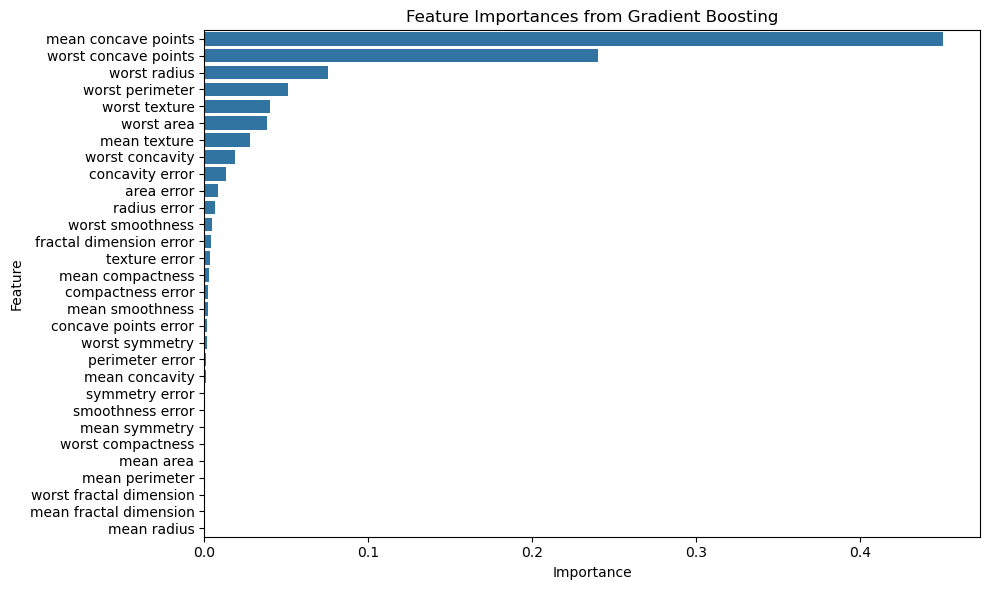

In [25]:
# Feature Importances
importances = best_model.feature_importances_
features = X.columns

# Sort and plot
sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
